In [1]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')

In [2]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg

# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm


df.Height = df.Height*2.54
df.Weight = df.Weight*0.45359237

print(df[['Height','Weight']].head())

       Height      Weight
0  187.571423  109.721075
1  174.706036   73.622792
2  188.239668   96.497629
3  182.196685   99.809586
4  177.499761   93.598695


<function matplotlib.pyplot.show(close=None, block=None)>

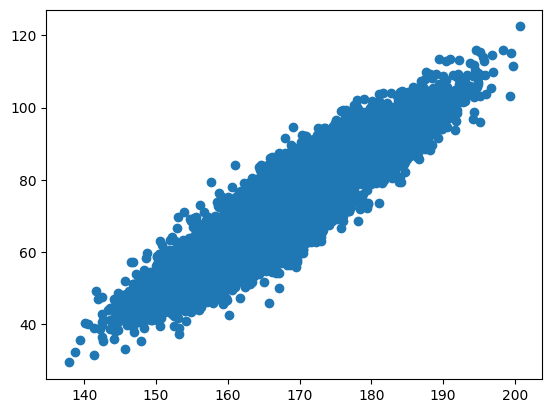

In [3]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt

data = df['Height']
target = df['Weight']

plt.plot(data, target, 'o')
plt.show

In [5]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(df.Height.values.reshape(-1,1), df.Weight)

LinearRegression()

In [6]:
# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

array([75.19390579])

In [7]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_

print('기울기: ',lr.coef_, '절편: ', lr.intercept_)

기울기:  [1.37815071] 절편:  -159.09171408121202


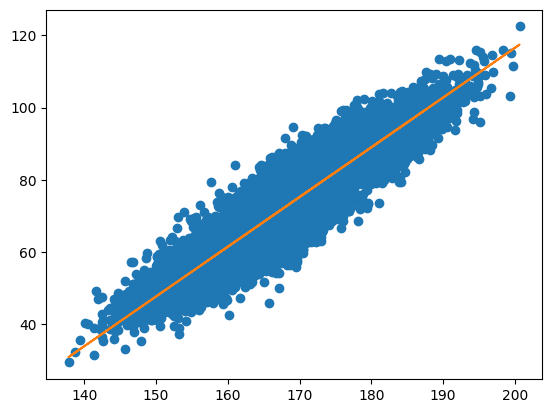

In [8]:
# 예측값 그래프 그리기
plt.plot(df.Height, df.Weight, 'o')
plt.plot(df.Height,lr.predict(df.Height.values.reshape(-1,1)))
plt.show()

In [20]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy배열로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()


# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [21]:
# 선형회귀모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

array([75.18687177])

In [22]:
# score 확인
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8518973635719952
0.8676317463826752


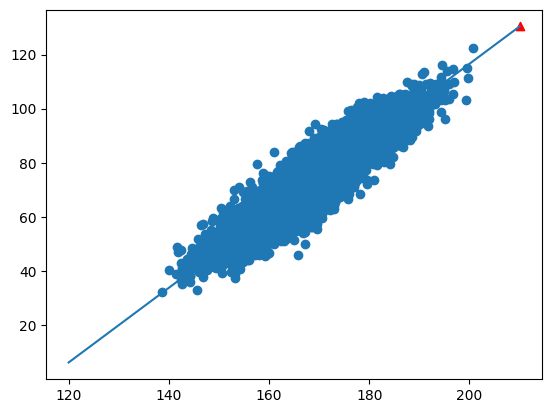

In [23]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(X_train , y_train)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()

# 로지스틱회귀분석
# 로컬 데이터 로드

In [25]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
study = pd.read_csv('공부시간과시험합격.csv',encoding='cp949')
study

,이름,공부시간,시험점수,합격여부
0,이원재,15.0,85.0,합격
1,맹승주,14.5,86.5,합격
2,안미경,14.0,86.0,합격
3,서진수,13.5,85.5,합격
4,황경인,13.0,85.0,합격
5,신운무,12.0,83.0,합격
6,권율,12.0,85.0,합격
7,강준,11.0,82.0,합격
8,신사임당,11.0,83.0,합격
9,문무왕,10.5,82.0,합격


# 공통 실습 코드

In [41]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# data  나누기
data = study['공부시간'].to_numpy()
target = study['합격여부'].to_numpy()

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [42]:
#Step 3. 학습 후 모델을 생성하고 예측을 수행합니다

# 로지스틱회귀 모델 생성
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 행(row)으로 되어있는 데이터, 열(column)로 나열
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# 모델 학습
lr.fit(X_train, y_train)


# 테스트용_data로 예측
print(X_train)
print(lr.predict(X_test))

[[13. ]
 [14. ]
 [ 8.2]
 [12. ]
 [11. ]
 [ 7.5]
 [14.5]
 [ 9. ]
 [15. ]
 [ 9. ]
 [ 7. ]
 [ 7.5]
 [10.5]
 [11. ]
 [10. ]
 [10. ]
 [12. ]]
['불합격' '합격' '불합격' '합격' '불합격' '합격' '불합격' '불합격']


In [43]:
import numpy as np

# 각 항목별 확률값 출력
print(np.round(lr.predict_proba(X_test),3))

[[0.547 0.453]
 [0.469 0.531]
 [0.807 0.193]
 [0.002 0.998]
 [0.901 0.099]
 [0.157 0.843]
 [0.807 0.193]
 [0.83  0.17 ]]


In [40]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
fruit_2 = pd.read_csv('과일채소목록_2.csv',encoding='cp949')
fruit_2

,종류,무게_g,길이_cm,당도,등급
0,거봉포도,291,29.1,9.1,A
1,거봉포도,290,29.0,9.0,A
2,거봉포도,281,28.1,8.1,B
3,거봉포도,280,28.0,8.0,B
4,거봉포도,271,26.1,8.6,B
5,거봉포도,270,26.0,8.5,B
6,거봉포도,251,25.1,7.6,C
7,거봉포도,250,25.0,7.5,C
8,거봉포도,221,22.1,7.1,C
9,거봉포도,220,22.0,7.0,C


In [54]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# data  나누기
data2 = fruit_2[['무게_g','길이_cm','당도']].to_numpy()
target2 = fruit_2['종류'].to_numpy()

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=40)

In [47]:
#Step 3. 데이터 표준화를 진행합니다(평균:0, 표준편차:1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_test)

st_train_data = ss.transform(X_train)
st_test_data = ss.transform(X_test)

print(X_train)
print(st_train_data)

    무게_g  길이_cm   당도
16  1801   20.1  6.6
35   110    3.6  7.5
25   400   23.0  1.0
21   500   25.0  2.0
44   451    8.1  7.6
41   600    8.5  8.0
23   450   20.0  3.0
36   101    3.6  6.1
5    270   26.0  8.5
13  2200   21.0  9.5
39    90    2.8  8.0
17  1800   20.0  6.5
43   500    8.0  8.0
24   401   23.1  1.1
3    280   28.0  8.0
22   451   20.1  3.1
40   601    8.6  8.1
26   381   22.1  1.6
34   111    3.7  7.6
20   501   25.1  2.1
28   351   20.1  1.4
14  2001   30.5  8.1
15  2000   30.0  8.0
30   151    3.9  8.6
8    221   22.1  7.1
46   401    7.6  7.3
32   121    3.8  7.1
9    220   22.0  7.0
48   400    7.5  7.2
42   501    8.1  8.1
10  2501   25.1  7.1
31   150    3.8  8.5
19  1500   16.0  8.5
47   401    6.6  6.6
12  2201   21.1  9.6
1    290   29.0  9.0
37   100    3.5  6.0
7    250   25.0  7.5
27   380   22.0  1.5
6    251   25.1  7.6
[[ 1.60932863  0.35657868 -0.27458871]
 [-0.70574982 -1.30075885  0.15149722]
 [-0.30872276  0.64786831 -2.92579005]
 [-0.17181688  0.84875

In [48]:
# 모델을 생성하고 테스트하고 성능을 확인합니다.
from sklearn.linear_model import LogisticRegression
import numpy as np

# 로지스틱회귀분석 모델 생성 및 학습
# C는 정규화 정도를 조절(기본값 : 1)
# C가 작을 수록 정규화 강하게, 과적합 방지
# C가 클 수록 정규화 약하게, 데이터에 맞춤(과적합 발생 가능성 높음)
# C값 범위 : 0.0001 ~ 10000
# max_iter의 기본값은 100

softmax_reg = LogisticRegression(C=5, max_iter=200)
softmax_reg.fit(st_train_data, y_train)


# 분류 결과 확인
print(softmax_reg.predict(st_test_data))


# 분류 확률 확인
print(np.round(softmax_reg.predict_proba(st_test_data),3))


# 분류 점수 확인
print(softmax_reg.score(st_test_data, y_test))

['자두' '옥수수' '참외' '자두' '참외' '거봉포도' '수박' '거봉포도' '수박' '거봉포도']
[[0.004 0.001 0.003 0.812 0.18 ]
 [0.002 0.001 0.994 0.    0.003]
 [0.015 0.013 0.026 0.312 0.634]
 [0.003 0.001 0.001 0.856 0.14 ]
 [0.035 0.025 0.011 0.194 0.737]
 [0.987 0.008 0.001 0.    0.005]
 [0.013 0.79  0.001 0.    0.196]
 [0.971 0.012 0.002 0.    0.015]
 [0.    0.997 0.    0.    0.002]
 [0.978 0.01  0.003 0.    0.009]]
1.0


 # KNN_수박_참외_맞추기

In [49]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,053 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [1]:
#파일 불러오기
import pandas as pd
src_data = pd.read_csv('수박과참외.csv',encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


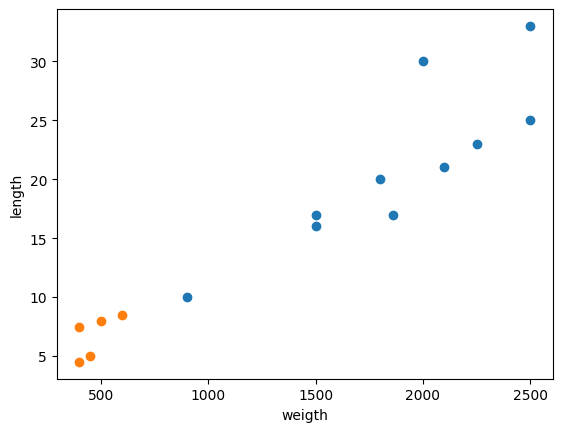

In [2]:
#수박과 참외의 무게와 길이
수박정보 = src_data.loc[ (src_data['종류'] =='수박'), ['무게','길이']]
참외정보 = src_data.loc[ (src_data['종류'] =='참외'), ['무게','길이']]

import matplotlib.pyplot as plt
plt.scatter(수박정보.무게,수박정보.길이)
plt.scatter(참외정보.무게,참외정보.길이)
plt.xlabel('weigth')
plt.ylabel('length')
plt.show()

In [5]:
import numpy as np

# np.column_stack을 통해 무게와 길이를 data 변수에 넣는다.
data3 = src_data[['무게', '길이']].to_numpy()
# np.column_stack((src_data.무게, src_data.길이)) 로도 가능하다.
# 데이터의 종류를 target에 넣는다.
target3 = src_data['종류'].to_numpy()

print(data3)
print(target3)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [ 900.    10. ]
 [2500.    33. ]
 [2250.    23. ]
 [1860.    17. ]
 [2100.    21. ]
 [1500.    17. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외'
 '참외']


In [6]:
# Step 4. 주어진 데이터를 훈련용과 테스트(검증용)으로 나눕니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3, target3, random_state=40)

In [7]:
# 데이터 구조(shape) 확인
print(X_train.shape, X_test.shape)

(11, 2) (4, 2)


In [8]:
# Step 5. 분석하여 모델을 생성합니다.
from sklearn.neighbors import KNeighborsClassifier
# knn 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X_train, y_train)

# 모델 평가
knn.score(X_test, y_test)

0.25

In [9]:
# Step 6. 모델이 정확한지 임의의 데이터로 테스트합니다.
print( knn.predict([[1000, 15]]))

['수박']


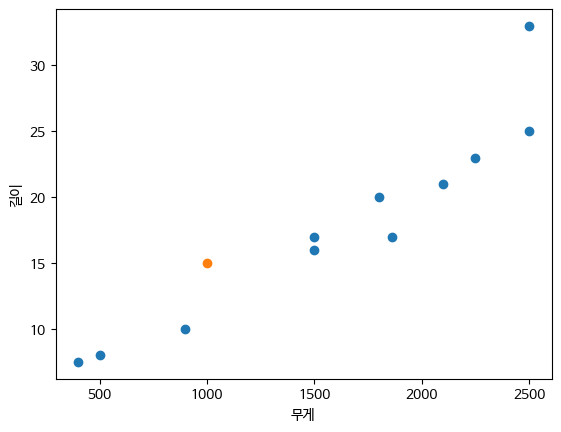

In [10]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

In [11]:
pip install --upgrade numpy==1.23.5

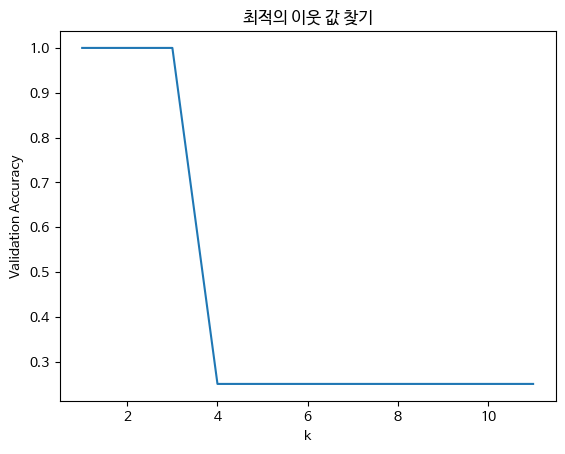

In [14]:
# Step 8. 최적의 k 값 찾기

# k값이 작으면 작을 수록 과적합이 일어날 확률이 높음 -> 가능한 큰 값을 선택하는게 좋음.
# k값이 클 수록 과도적합이 일어날 화률이 높음 -> 너무 크면 안됨.

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

k_list = range(1,12)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()

In [ ]:
# 최적의 K 값 가지고 실행


# [연습문제] KNN_생선분류하기

In [15]:
import pandas as pd
fish = pd.read_csv('fish1.csv',encoding='cp949')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [20]:
# 생성 데이터 프레임에서, 도미와 방어의 데이터로 분리 ( df.loc 추천 )
# 도미 : Species가 Bream인 행
# 두께 : Width
# 무게 : Weight
도미_두께 = fish.loc[:34,'Width']
도미_무게 = fish.loc[:34,'Weight']
print('도미수:',len(도미_두께))

빙어_두께 = fish.loc[36:,'Width']
빙어_무게 = fish.loc[36:,'Weight']
print('빙어수:',len(빙어_두께))

도미수: 35
빙어수: 13


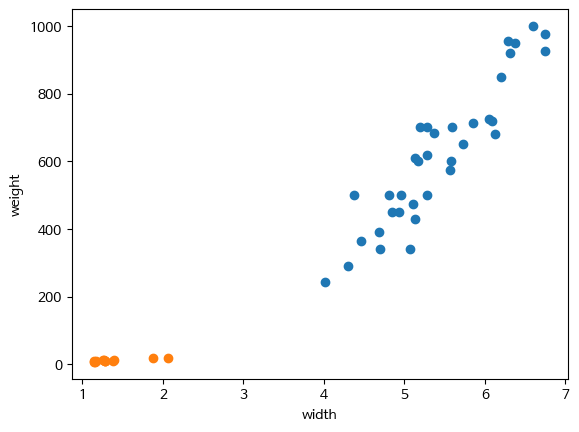

In [21]:
import matplotlib.pyplot as plt

# 도미와 방어의 두께, 무게 산점도 그리기
plt.scatter(도미_두께, 도미_무게)
plt.scatter(빙어_두께, 빙어_무게)
plt.xlabel('width')
plt.ylabel('weight')
plt.show()

In [22]:
import numpy as np

# 가로로 나열되어 있는 Weight와 Width 세로로 합쳐서 data 만들기
data4 = fish[['Weight', 'Width']].to_numpy()

# 물고기 종류로 target 만들기
target4 = fish['Species'].to_numpy()

print(data4)
print(target4)

[[ 242.        4.02  ]
 [ 290.        4.3056]
 [ 340.        4.6961]
 [ 363.        4.4555]
 [ 430.        5.134 ]
 [ 450.        4.9274]
 [ 500.        5.2785]
 [ 390.        4.69  ]
 [ 450.        4.8438]
 [ 500.        4.9594]
 [ 475.        5.1042]
 [ 500.        4.8146]
 [ 500.        4.368 ]
 [ 340.        5.0728]
 [ 600.        5.1708]
 [ 600.        5.58  ]
 [ 700.        5.2854]
 [ 700.        5.1975]
 [ 610.        5.1338]
 [ 650.        5.7276]
 [ 575.        5.5695]
 [ 685.        5.3704]
 [ 620.        5.2801]
 [ 680.        6.1306]
 [ 700.        5.589 ]
 [ 725.        6.0532]
 [ 720.        6.09  ]
 [ 714.        5.8515]
 [ 850.        6.1984]
 [1000.        6.603 ]
 [ 920.        6.3063]
 [ 955.        6.292 ]
 [ 925.        6.7497]
 [ 975.        6.7473]
 [ 950.        6.3705]
 [   6.7       1.0476]
 [   7.5       1.16  ]
 [   7.        1.1484]
 [   9.7       1.38  ]
 [   9.8       1.2772]
 [   8.7       1.2852]
 [  10.        1.2838]
 [   9.9       1.1659]
 [   9.8   

In [23]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data4, target4, random_state=40)

In [24]:
# KNN 라이브러리 Import
from sklearn.neighbors import KNeighborsClassifier
# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)
# KNN 모델 학습
knn.fit(X_train, y_train)
# score 출력
knn.score(X_test, y_test)

1.0

In [26]:
# 데이터 넣어서 결과 확인 : ['Smelt']
print(knn.predict([[25, 1.5]]))

['Smelt']


In [27]:
# 데이터 넣어서 결과 확인 : ['Bream']
print(knn.predict([[250, 5.1]]))

['Bream']


#[연습문제] 로지스틱회귀분석_다중분류

In [59]:
import pandas as pd
fish3 = pd.read_csv('fish3.csv',encoding='cp949')
fish3

,종류,무게,길이,높이,두께
0,도미,242.0,25.4,11.5200,4.0200
1,도미,290.0,26.3,12.4800,4.3056
2,도미,340.0,26.5,12.3778,4.6961
3,도미,363.0,29.0,12.7300,4.4555
4,도미,430.0,29.0,12.4440,5.1340
...,...,...,...,...,...
143,빙어,12.2,12.2,2.0904,1.3936
144,빙어,13.4,12.4,2.4300,1.2690
145,빙어,12.2,13.0,2.2770,1.2558
146,빙어,19.7,14.3,2.8728,2.0672


In [60]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석

from sklearn.model_selection import train_test_split
# 무게, 길이, 높이, 두께에 따른 종류 분류
data5 = fish3[['무게','길이', '높이','두께']].to_numpy()
target5 = fish3['종류'].to_numpy()

print(data5)
print(target5)
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data5, target5, test_size=0.2, random_state=40)

[[2.42000e+02 2.54000e+01 1.15200e+01 4.02000e+00]
 [2.90000e+02 2.63000e+01 1.24800e+01 4.30560e+00]
 [3.40000e+02 2.65000e+01 1.23778e+01 4.69610e+00]
 [3.63000e+02 2.90000e+01 1.27300e+01 4.45550e+00]
 [4.30000e+02 2.90000e+01 1.24440e+01 5.13400e+00]
 [4.50000e+02 2.97000e+01 1.36024e+01 4.92740e+00]
 [5.00000e+02 2.97000e+01 1.41795e+01 5.27850e+00]
 [3.90000e+02 3.00000e+01 1.26700e+01 4.69000e+00]
 [4.50000e+02 3.00000e+01 1.40049e+01 4.84380e+00]
 [5.00000e+02 3.07000e+01 1.42266e+01 4.95940e+00]
 [4.75000e+02 3.10000e+01 1.42628e+01 5.10420e+00]
 [5.00000e+02 3.10000e+01 1.43714e+01 4.81460e+00]
 [5.00000e+02 3.15000e+01 1.37592e+01 4.36800e+00]
 [3.40000e+02 3.20000e+01 1.39129e+01 5.07280e+00]
 [6.00000e+02 3.20000e+01 1.49544e+01 5.17080e+00]
 [6.00000e+02 3.20000e+01 1.54380e+01 5.58000e+00]
 [7.00000e+02 3.30000e+01 1.48604e+01 5.28540e+00]
 [7.00000e+02 3.30000e+01 1.49380e+01 5.19750e+00]
 [6.10000e+02 3.35000e+01 1.56330e+01 5.13380e+00]
 [6.50000e+02 3.35000e+01 1.447

In [61]:
#Step 3. 데이터 표준화를 진행합니다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_test)

st_train_data = ss.transform(X_train)
st_test_data = ss.transform(X_test)

print(X_train)
print(st_train_data)

[[1.00000e+03 4.35000e+01 1.26040e+01 8.14200e+00]
 [3.40000e+02 2.65000e+01 1.23778e+01 4.69610e+00]
 [2.00000e+02 3.23000e+01 5.56800e+00 3.37560e+00]
 [5.00000e+02 2.97000e+01 1.41795e+01 5.27850e+00]
 [9.80000e+00 1.20000e+01 2.20440e+00 1.14840e+00]
 [9.00000e+02 4.00000e+01 1.17300e+01 7.22500e+00]
 [6.00000e+02 3.20000e+01 1.54380e+01 5.58000e+00]
 [3.63000e+02 2.90000e+01 1.27300e+01 4.45550e+00]
 [8.00000e+01 1.90000e+01 5.63580e+00 3.05020e+00]
 [3.90000e+02 3.17000e+01 9.48500e+00 5.35500e+00]
 [1.20000e+02 2.10000e+01 6.11460e+00 3.29430e+00]
 [1.20000e+02 2.00000e+01 6.21600e+00 3.57420e+00]
 [8.50000e+02 4.00000e+01 1.19286e+01 7.10640e+00]
 [2.50000e+02 2.75000e+01 7.28280e+00 4.56620e+00]
 [1.30000e+02 2.20000e+01 6.11000e+00 3.52500e+00]
 [3.45000e+02 3.85000e+01 6.39600e+00 3.97700e+00]
 [1.00000e+02 1.80000e+01 5.22240e+00 3.32160e+00]
 [7.00000e+00 1.06000e+01 1.72840e+00 1.14840e+00]
 [5.67000e+02 4.60000e+01 7.79200e+00 4.87000e+00]
 [7.00000e+02 3.50000e+01 1.624

In [62]:
# 모델을 생성하고 테스트하고 성능을 확인합니다.
from sklearn.linear_model import LogisticRegression
import numpy as np
# 로지스틱 회귀 모델 생성(C, max_iter 속성 정하기)
softmax_reg = LogisticRegression(C=5, max_iter=200)

# 모델 학습
softmax_reg.fit(st_train_data, y_train)

# 모델 예측 결과 출력
print(softmax_reg.predict(st_test_data))

# 분류 확률 출력
print(np.round(softmax_reg.predict_proba(st_test_data),3))

# 점수 출력
print(softmax_reg.score(st_test_data, y_test))

['잉어' '농어' '농어' '농어' '농어' '빙어' '농어' '빙어' '잉어' '도미' '빙어' '강꼬치고기' '농어' '농어'
 '농어' '농어' '농어' '강꼬치고기' '강꼬치고기' '도미' '농어' '도미' '강꼬치고기' '농어' '도미' '잉어' '농어'
 '도미' '도미' '강꼬치고기']
[[0.006 0.413 0.002 0.14  0.02  0.418]
 [0.016 0.54  0.004 0.035 0.029 0.378]
 [0.012 0.483 0.006 0.02  0.036 0.443]
 [0.019 0.658 0.004 0.006 0.033 0.28 ]
 [0.041 0.843 0.014 0.    0.095 0.007]
 [0.003 0.18  0.001 0.62  0.006 0.19 ]
 [0.024 0.649 0.007 0.002 0.046 0.272]
 [0.    0.009 0.    0.982 0.    0.008]
 [0.017 0.379 0.041 0.001 0.085 0.477]
 [0.    0.    0.982 0.    0.01  0.008]
 [0.    0.029 0.    0.947 0.    0.024]
 [0.967 0.032 0.    0.    0.001 0.   ]
 [0.005 0.894 0.011 0.    0.088 0.002]
 [0.018 0.626 0.005 0.005 0.039 0.307]
 [0.015 0.46  0.019 0.003 0.062 0.442]
 [0.011 0.582 0.04  0.    0.11  0.257]
 [0.051 0.799 0.006 0.    0.055 0.089]
 [0.937 0.062 0.    0.    0.001 0.   ]
 [0.579 0.397 0.    0.    0.009 0.015]
 [0.    0.001 0.981 0.    0.015 0.004]
 [0.003 0.96  0.001 0.    0.034 0.001]
 [0.    0.  

#[연습문제] 로지스틱회귀분석_이진분류

In [37]:
import pandas as pd
fish2 = pd.read_csv('fish2.csv',encoding='cp949')
fish2

,종류,무게
0,도미,430
1,도미,450
2,도미,500
3,도미,390
4,도미,450
5,도미,500
6,도미,475
7,도미,500
8,도미,500
9,도미,600


In [54]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석

from sklearn.model_selection import train_test_split
# 무게에 따른 종류 분류
data6 = fish2['무게'].to_numpy()
target6 = fish2['종류'].to_numpy()

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data6, target6, test_size=0.2, random_state=1)

In [55]:
#Step 3. 학습 후 모델을 생성하고 예측을 수행합니다

# 로지스틱 회귀분석 모델 생성
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# 학습
lr.fit(X_train, y_train)

# 예측
print(lr.predict(X_test))

['잉어' '도미' '잉어' '잉어' '도미' '도미' '잉어' '도미' '잉어' '도미']


In [56]:
# 각 항목별 확률값 출력
print(np.round(lr.predict_proba(X_test),3))

[[0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.961 0.039]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]]


In [57]:
print(lr.predict([[400]]))

['도미']


In [58]:
print(lr.predict([[200]]))

['잉어']


# 다이아몬드 값 예측하기

In [5]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.shape

(53940, 11)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [12]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [15]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [16]:
label_data = data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
  label_data[col] = label_encoder.fit_transform(label_data[col])
  label_data.head()

<Axes: >

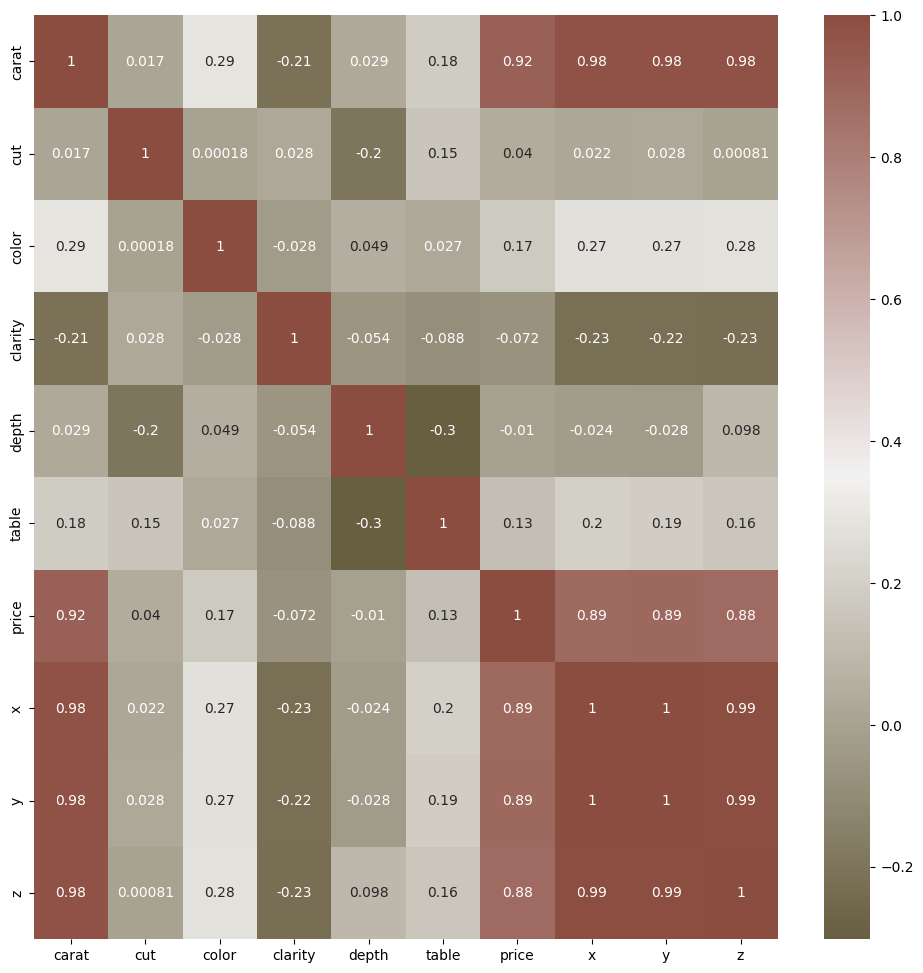

In [24]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [27]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [29]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
  cv_score = cross_val_score(model, X_train, y_train, scoring = "neg_root_mean_squared_error", cv=10)
  cv_results_rms.append(cv_score)
  print("%s: %f" % (pipe_dict[i], cv_score.mean()))

In [31]:
pred = pipeline_xgb.predict(X_test)

In [32]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.17333984375
MSE: 307728.1875
RMSE: 554.7325369040472
